### This notebook is used to create plots for SVM and decision trees

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

## Helper functions

Source code is taken from this repo from chapters 5 and 6: https://github.com/ageron/handson-ml2

[Chapter 5 – Support Vector Machines](https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb)

[Chapter 6 – Decision Trees](https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb)

In [3]:
image_folder = '../img'


def save_fig(filename, format='jpg'):
    '''
    Save image to 'image_folder'
    '''
    path = os.path.join(image_folder, filename + "." + format)
    print("Saving figure", filename)
    plt.tight_layout()
    plt.savefig(path, format=format, dpi=300)

In [4]:
def plot_dataset(X, y, axes):
    '''
    Draw 2D dataset
    '''
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

In [5]:
def plot_predictions(clf, axes):
    '''
    Draw decision boundary for SVM classifier
    '''
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [6]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    '''
    Draw decision boundary for tree classifier
    '''
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y == 0], X[:, 1][y == 0],
                 "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y == 1], X[:, 1][y == 1],
                 "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y == 2], X[:, 1][y == 2],
                 "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=14)
        plt.ylabel(r"$x_2$", fontsize=14, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

# SVM

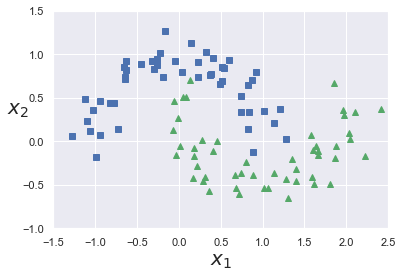

In [7]:
# Generate moon dataset
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

axes = [-1.5, 2.5, -1, 1.5]

plot_dataset(X, y, axes)
plt.show()

In [8]:
# Train four models with feature scaling

SVM_linear = Pipeline([("scaler", StandardScaler()),
                       ("svm_clf", SVC(kernel="linear"))
                       ])
SVM_linear.fit(X, y)

SVM_poly = Pipeline([("scaler", StandardScaler()),
                     ("svm_clf", SVC(kernel="poly"))
                     ])
SVM_poly.fit(X, y)

SVM_rbf = Pipeline([("scaler", StandardScaler()),
                    ("svm_clf", SVC(kernel="rbf"))
                    ])
SVM_rbf.fit(X, y)

SVM_sigmoid = Pipeline([("scaler", StandardScaler()),
                        ("svm_clf", SVC(kernel="sigmoid"))
                        ])
SVM_sigmoid.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(kernel='sigmoid'))])

Saving figure SVM_kernels


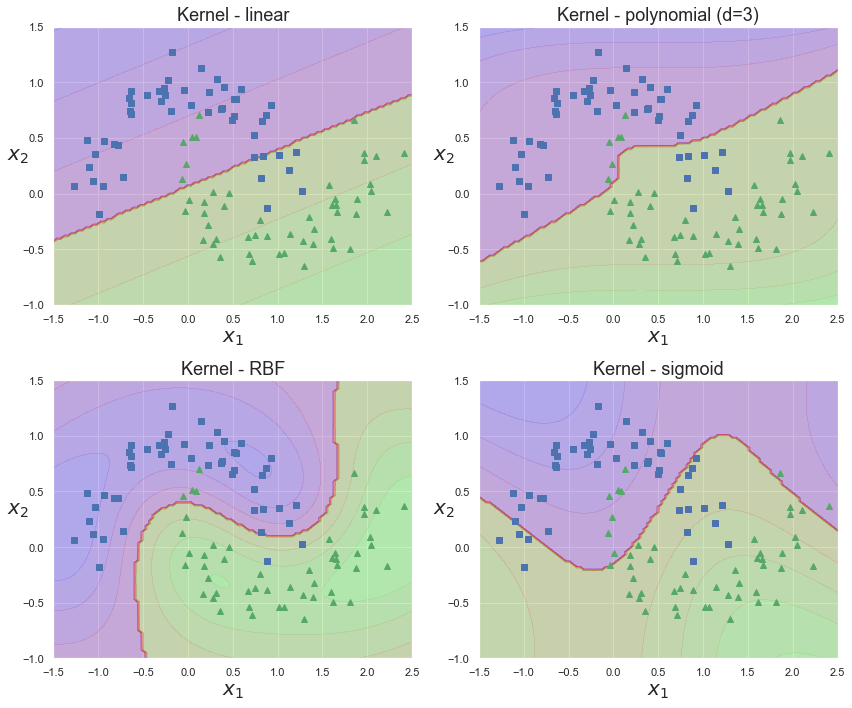

In [9]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plot_predictions(SVM_linear, axes)
plot_dataset(X, y, axes)
plt.title("Kernel - linear", fontsize=18)

plt.subplot(2, 2, 2)
plot_predictions(SVM_poly, axes)
plot_dataset(X, y, axes)
plt.title("Kernel - polynomial (d=3)", fontsize=18)

plt.subplot(2, 2, 3)
plot_predictions(SVM_rbf, axes)
plot_dataset(X, y, axes)
plt.title("Kernel - RBF", fontsize=18)

plt.subplot(2, 2, 4)
plot_predictions(SVM_sigmoid, axes)
plot_dataset(X, y, axes)
plt.title("Kernel - sigmoid", fontsize=18)

plt.subplots_adjust(wspace=0.3, hspace=0.3)  # distance between plots
save_fig("SVM_kernels")
plt.show()

# Decision Trees

## Classification

In [10]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=53)

Saving figure decision_tree_classifier


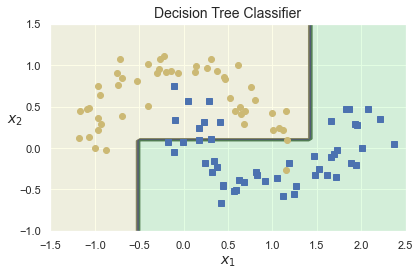

In [11]:
# Try different hyperparameters for the classification tree

# max_depth - The maximum depth of the tree
# min_samples_leaf - The minimum number of samples required to split an internal node

tree_classif = DecisionTreeClassifier(max_depth=2)
tree_classif.fit(X, y)

plt.figure(figsize=(6, 4))
plot_decision_boundary(tree_classif, X, y,
                       axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("Decision Tree Classifier", fontsize=14)

save_fig("decision_tree_classifier")
plt.show()

## Regression

In [12]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

Saving figure decision_tree_regressor


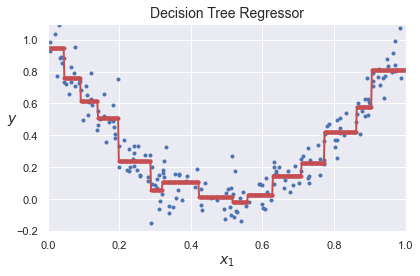

In [13]:
# Try different hyperparameters for the regression tree

# max_depth - The maximum depth of the tree
# min_samples_leaf - The minimum number of samples required to split an internal node
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_leaf=10)
tree_reg.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg.predict(x1)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2)
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.title("Decision Tree Regressor", fontsize=14)

save_fig("decision_tree_regressor")
plt.show()

### Display tree structure

In [14]:
tree_to_display = tree_classif

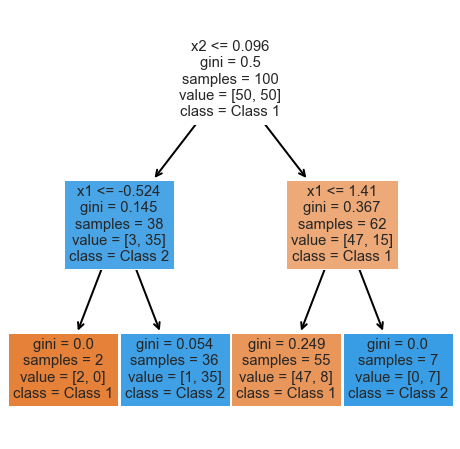

In [15]:
fig = plt.figure(figsize=(8,8))
out = tree.plot_tree(tree_classif, 
                   feature_names=['x1', 'x2'],  
                   class_names=['Class 1', 'Class 2'],
                   filled=True)

# if arrows are not displayed
# that's what I got
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)
        